# Battle of Neighbourhood - Bangalore

### Importing Packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


### Loading the Geolocation Data

In [3]:
# The code was removed by Watson Studio for sharing.

### Converting JSON to DF

In [4]:
data = json.load(body)
dfjs=[]
for area in data["features"]:
    dfjs.append(area['properties'])
df = pd.DataFrame(dfjs)
df = df[['WARD_NAME','LAT','LON']]
print(df.shape)
df.head()

(198, 3)


,WARD_NAME,LAT,LON
0,Chowdeswari Ward,13.121709,77.580422
1,Atturu,13.102805,77.560038
2,Yelahanka Satellite Town,13.090987,77.583925
3,Vijnanapura,13.006063,77.669565
4,Basavanapura,13.016847,77.715456


### Finding different location details using Foursquare

In [ ]:
neighborhood_latitude =12.972442
neighborhood_longitude = 77.580643


CLIENT_ID = 'QGEESMKPCO1WIAXXQ0NM15QFWO2YATAROUPQ1RTKA4HDNAJB' # your Foursquare ID
CLIENT_SECRET = 'GYHBLLJRIQBU4UJKA0IZYM0KPAFX3Q1UCFZJ5XBEEMLZBI2R' # your Foursquare Secret
VERSION = '20190605'
LIMIT = 100

radius = 2000

cat = ['school','restaurant','park','cafe','hospital','temple','store','shop','theater','hotel','taxi','bus','pharmacy','café']
catlst=[]

for lat, lon, area in list(zip(df['LAT'], df['LON'], df['WARD_NAME'])):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius, 
        LIMIT)
    
    results = requests.get(url).json()
    print(results)
    dfa=''
    
    try:
        for i in results['response']['groups'][0]['items']:
            dfa = dfa+i['venue']['categories'][0]['name']+','
    except:
        dfa=''
    lst=''
    for categ in cat:
        if categ in dfa.lower() and categ not in lst:
            lst=lst+categ+'|'
    catlst.append(lst)
df['Area']=catlst
df.head(20)

### Calculating Score of different areas

In [6]:
score=[]
for ele in df['Area']:
    score.append((len(ele.split('|'))-1)/len(cat)*100)
df["Score"]=score
df.head(20)

,WARD_NAME,LAT,LON,Area,Score
0,Chowdeswari Ward,13.121709,77.580422,park|shop|bus|,21.428571
1,Atturu,13.102805,77.560038,restaurant|,7.142857
2,Yelahanka Satellite Town,13.090987,77.583925,restaurant|shop|hotel|bus|café|,35.714286
3,Vijnanapura,13.006063,77.669565,restaurant|store|shop|café|,28.571429
4,Basavanapura,13.016847,77.715456,restaurant|hotel|café|,21.428571
5,Hudi,13.022376,77.705493,restaurant|store|hotel|bus|café|,35.714286
6,Devasandra,13.001797,77.689122,restaurant|store|shop|theater|hotel|bus|café|,50.000000
7,A Narayanapura,12.994474,77.672583,restaurant|store|shop|bus|café|,35.714286
8,Vijnana Nagar,12.978493,77.681770,restaurant|store|shop|theater|hotel|café|,42.857143
9,HAL Airport,12.956537,77.671502,restaurant|store|shop|,21.428571


### Data Visualisation - Box Plot

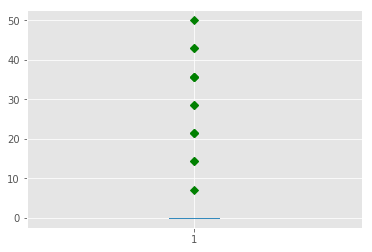

In [7]:
y = df[['WARD_NAME','Score']]
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style
plt.boxplot(df["Score"], 0, 'gD')

plt.show()

###  Data Visualisation - Map

In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
threshold_scale = np.linspace(df['Score'].min(),
                              df['Score'].max(),
                              4, dtype=int)
#print(threshold_scale)
# add markers to map
for lat, lon, col,score in zip(df['LAT'], df['LON'], df['WARD_NAME'], df['Score']):
    if score>47:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.0,
            parse_html=False).add_to(map_newyork)
    elif score>23:
        folium.CircleMarker(
            [lat, lon],
            popup=col+' ==> Net Score :'+str(score)+'%',
            radius=5,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.0,
            parse_html=False).add_to(map_newyork)
    else:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.0,
            parse_html=False).add_to(map_newyork)

    #folium.Marker([lat,lon], popup=col+df['Area']).add_to(map_newyork) 
        
map_newyork

### Listing Top 10 Areas

In [9]:
df = df.sort_values(['Score'], ascending=False)
print("Top Ten Area with Recquirements for living within 3KM in Bengaluru :\n",df["WARD_NAME"].head())

Top Ten Area with Recquirements for living within 3KM in Bengaluru :
 6                   Devasandra
8                Vijnana Nagar
10           Dodda Bommasandra
13                 Thanisandra
2     Yelahanka Satellite Town
Name: WARD_NAME, dtype: object
